# Capstone Project (Real or Not? NLP with Disaster Tweets)

Predict which Tweets are about real disasters and which ones are not.

## Project Overview

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring tweets(i.e. disaster relief organizations and news agencies) but, it’s not always clear whether a person’s words are actually announcing a disaster.

Take an example of a tweet *'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE'*.The author of the tweet explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid but it’s less clear to a machine.

Kaggle hosted this challenge on their platform and dataset was created by the company figure-eight originally shared on their ‘Data For Everyone’ website here.


## The Problem

The problem to be solved by this project is how to identify which tweets are about real disasters and which one’s aren’t.This project will build a machine learning model to predict which Tweets are about real disasters and which one’s aren’t.


# 1. Analysis 

## Part I: Business understanding

Objective of the capstone project is to understand the business domain, analyze and explore the given data set then train and fit the a machine learning model and finally classify given test tweets data into announcing disaster or not.Disaster relief organizations and News Agencies would be the main users of this kind of application. The data is provided by company figure-eight which contains about 10000 tweets and they are hand labeled.

## Part II: Data Exploration

Given dataset contains 3 files:
- `train.csv` - the training set
- `test.csv` - the test set
- `sample_submission.csv` - a sample submission file in the correct format

Each sample in the train and test set has the following information:
- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

Features in the files:
- `id` - a unique identifier for each tweet
- `text` - the text of the tweet
- `location` - the location the tweet was sent from (may be blank)
- `keyword` - a particular keyword from the tweet (may be blank)
- `target` - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [131]:
#Importing the required libraries to read,visualize and model the givn dataset files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import re
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from platform import python_version
print (python_version())

3.6.9


In [132]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [133]:
# Read the dataset csv files and create pandas datframes
train_df=pd.read_csv("https://raw.githubusercontent.com/pavstar619/Data-Science-Capstone/master/train.csv")
test_df=pd.read_csv("https://raw.githubusercontent.com/pavstar619/Data-Science-Capstone/master/test.csv")
print("Train and Test data sets are imported successfully")
#X=train_df.text
#y=train_df.target

Train and Test data sets are imported successfully


In [134]:
# Define a function to explore the train and test dataframes
def explore_data(df):
    
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [135]:
# Lets use explore_data() function to explore train data
explore_data(train_df)

--------------------------------------------------
Shape of the dataframe: (7613, 5)
Number of records in train data set: 7613
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [136]:
# Lets use explore_data() function to explore test data
explore_data(test_df)

--------------------------------------------------
Shape of the dataframe: (3263, 4)
Number of records in train data set: 3263
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


It seems train and test dataset has 'NaN' values for `keyword` and `location` columns. Let's explore the dataset further for missing data values.

In [137]:
#Calculate count and percentage of missing values in the dataframe

def missing_values(df):
    
    '''Input- df=pandas dataframe
       Output- print missing records count and % of the input dataframe and visualize using MSNO
    '''
    
    print("Number of records with missing location:",df.location.isnull().sum())
    print("Number of records with missing keywords:",df.keyword.isnull().sum())
    print('{}% of location values are missing from Total Number of Records.'.format(round((df.location.isnull().sum())/(df.shape[0])*100),2))
    print('{}% of keywords values are missing from Total Number of Records.'.format(round((df.keyword.isnull().sum())/(df.shape[0])*100),2))
    msno.matrix(df);

Number of records with missing location: 2533
Number of records with missing keywords: 61
33.0% of location values are missing from Total Number of Records.
1.0% of keywords values are missing from Total Number of Records.


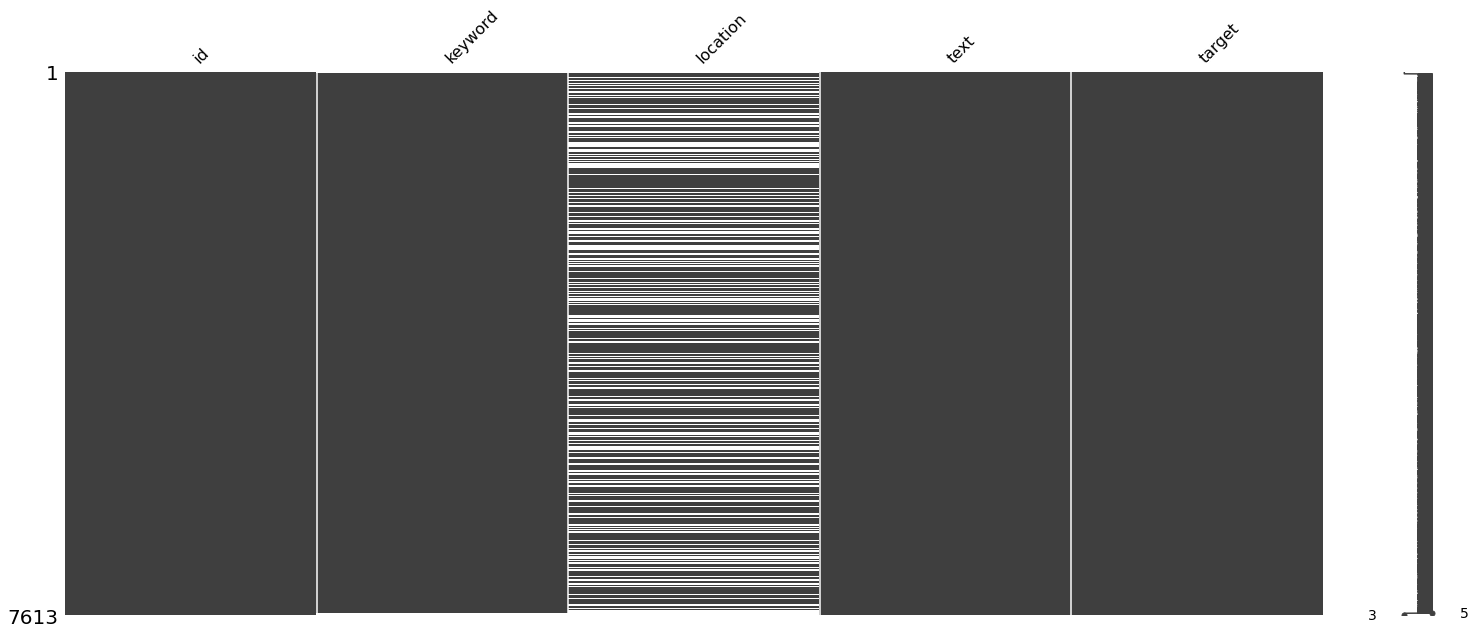

In [138]:
# Lets use missing_values function to explore train dataset
missing_values(train_df)

Number of records with missing location: 1105
Number of records with missing keywords: 26
34.0% of location values are missing from Total Number of Records.
1.0% of keywords values are missing from Total Number of Records.


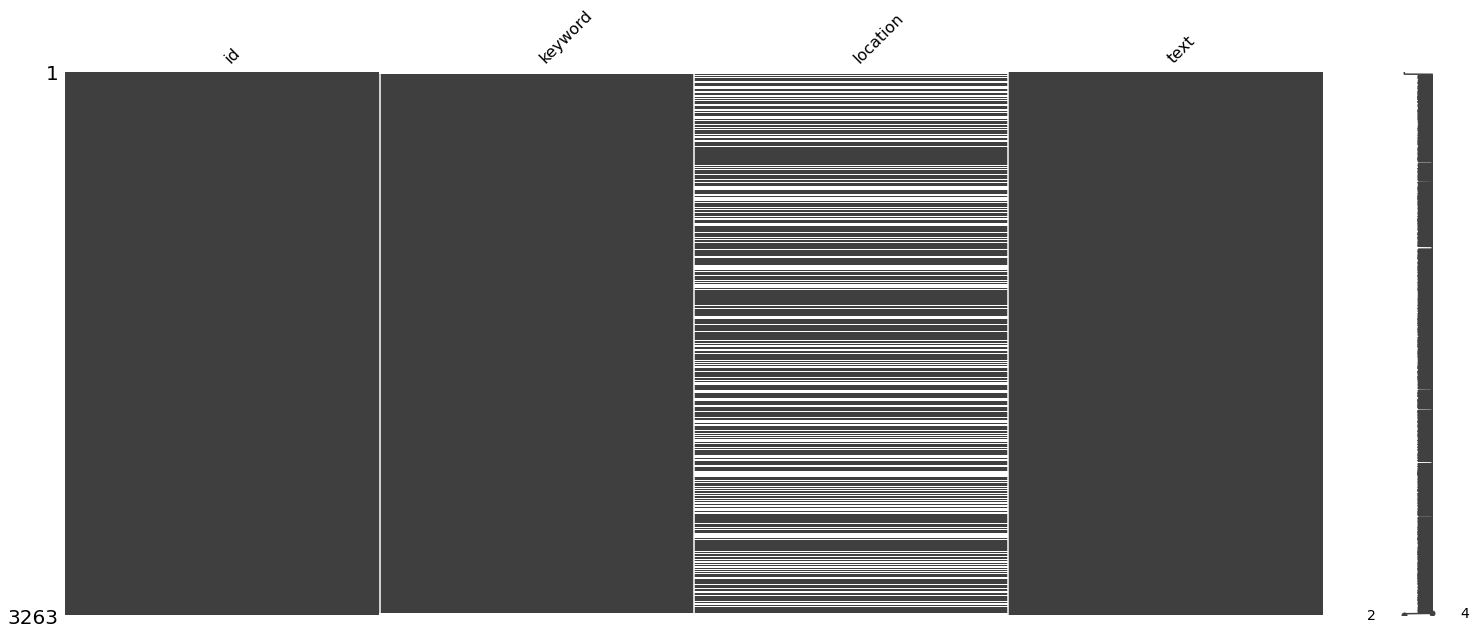

In [139]:
# Lets use missing_values function to explore train dataset
missing_values(test_df);

From train data frame description and analysis, it is obivous that:
- `location` feature is not automatically generated feature, and it seems it is user input hence too many records are missing.In my opinion, `location` column from our dataset could be dropped.
- We will keep the `keyword` feature because there are a lot of unique keywords and missing values are very insignificant (< 1 percentage)

In [140]:
#Lets visulaize dataframe features using charts
def feature_viz(df,feature):
    
    '''Input- df=pandas dataframe
              feature= column to be charted
       Output- bar and scatter chart using plotly       
    
    '''
    #Visualize the feature
    if feature=='target':
        sns.countplot(feature, data=df)
        print('Target of 0 is {} % of total'.format(round(df[feature].value_counts()[0]/len(df[feature])*100)))
        print('Target of 1 is {} % of total'.format(round(df[feature].value_counts()[1]/len(df[feature])*100)))
    else:
        #Distinct keywords in train dataset
        feat=df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
        fig.show()

Target of 0 is 57.0 % of total
Target of 1 is 43.0 % of total


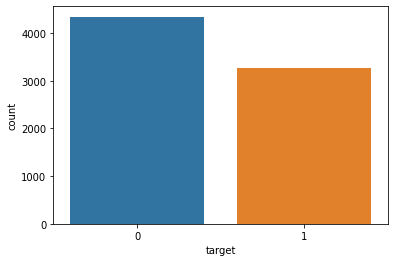

In [141]:
#Lets use feature_viz function to create charts for 'target' column
feature_viz(train_df,'target')

In [142]:
#Lets use feature_viz function to create charts for 'keyword' column
feature_viz(train_df,'keyword')

fatalities    45
deluge        42
armageddon    42
damage        41
sinking       41
Name: keyword, dtype: int64


Let's check how often the word 'disaster' come in the 'text' feature in the dataset and whether this help us in determining whether a tweet belongs to a disaster' category or not.

In [143]:
train_df.loc[train_df['text'].str.contains('disaster', na=False, case=False)].target.value_counts()

1    102
0     40
Name: target, dtype: int64

It seems even though word disaster is part of the tweets but that doesn't mean tweet announces a real disaster.

In [144]:
#Lets use feature_viz function to create charts for 'location' column
feature_viz(train_df,'location')

USA              104
New York          71
United States     50
London            45
Canada            29
Name: location, dtype: int64


### Exploring the 'location' column

Even though the column 'location' has lots of missing values, let's check the top 20 locations present in the dataset. Since some of the locations are duplicated, lets clean the duplicate locations and plot them.

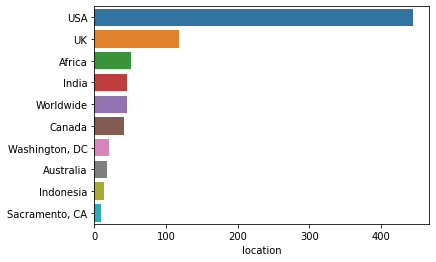

In [145]:
# Replacing the ambigious locations name with standard names and create a dictionary object

loc_dict={'United States':'USA','New York':'USA',"London":'UK',"Los Angeles, CA":'USA',"Washington, D.C.":'USA',
          "California":'USA',"Chicago, IL":'USA',"Chicago":'USA',"New York, NY":'USA',"California, USA":'USA',
          "FLorida":'USA',"Nigeria":'Africa',"Kenya":'Africa',"Everywhere":'Worldwide',"San Francisco":'USA',
          "Florida":'USA',"United Kingdom":'UK',"Los Angeles":'USA',"Toronto":'Canada',"San Francisco, CA":'USA',
          "NYC":'USA',"Seattle":'USA',"Earth":'Worldwide',"Ireland":'UK',"London, England":'UK',"New York City":'USA',
          "Texas":'USA',"London, UK":'UK',"Atlanta, GA":'USA',"Mumbai":"India"}

train_df['location'].replace(loc_dict,inplace=True)

#Create barchart for top 10 locations using seaborn
sns.barplot(y=train_df['location'].value_counts()[:10].index,x=train_df['location'].value_counts()[:10],
            orient='h');

It doesn't seem that `location` feature has any value in our analysis and could be dropped from the dataframe.

In [146]:
# Drop the column 'location' from the training dataset
train_df=train_df.drop(['location'],axis=1)

Lets further analyize the `text` feature and if there is any correlation between `text` and length of the tweets itself.

In [147]:
# Lets find the length of the 'text' for each row and add a new cloumn to train dataframe 
train_df['text_length'] = train_df['text'].apply(lambda x : len(x))
train_df.head(4)

,id,keyword,text,target,text_length
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,65


In [148]:
train_df.text_length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

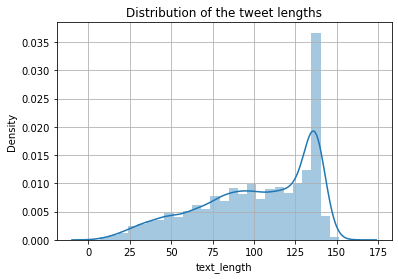

In [149]:
#Create distribution chart to visualize text length distribution
ax=sns.distplot(train_df['text_length']).set_title('Distribution of the tweet lengths');
plt.grid(True)

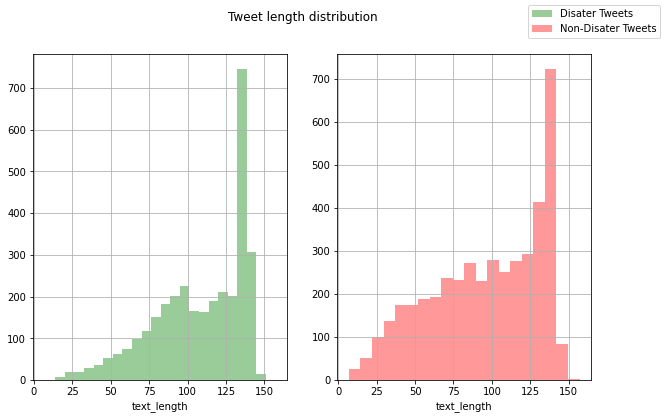

In [150]:
#Create visualization of the distribution of text length in comparision to target feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(train_df[(train_df['target'] == 1)]['text_length'], ax=ax1, kde=False, color='green',label='Disater Tweets')
sns.distplot(train_df[(train_df['target'] == 0)]['text_length'],ax=ax2, kde=False, color='red',label='Non-Disater Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

The distribution of both kind of tweets seems to be almost same.About 120 to 140 characters in a tweet are the most common among both.

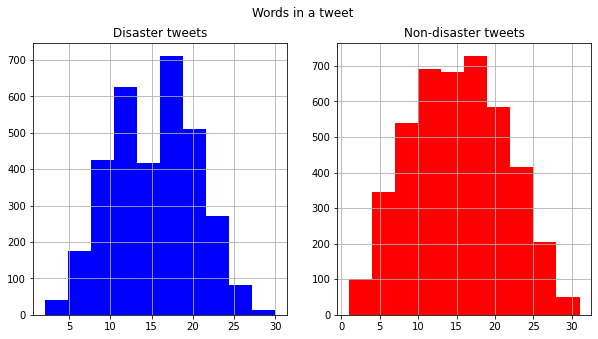

In [151]:
#Create visualization of the distribution of the word counts in comparision to target feature
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
dis_tweet=train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(dis_tweet,color='blue')
ax1.set_title('Disaster tweets')
ax1.grid()
nondis_tweet=train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(nondis_tweet,color='red')
ax2.set_title('Non-disaster tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

### Exploring the Target Column

- Distribution of the Target Column-
   - We have to predict whether a given tweet is about a real disaster or not.
   - If real disaster, predict a `1`. If not, predict a `0`.
- Exploring the Target Column- Let's look at what the disaster and the non disaster tweets look like.

In [152]:
# A disaster tweet exmaple
train_df[train_df['target']==1]['text'][10:20]

10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
46    How the West was burned: Thousands of wildfire...
Name: text, dtype: object

In [153]:
#A non-disaster tweet example
train_df[train_df['target']==0]['text'][10:20]

25                       No way...I can't eat that shit
26                                Was in NYC last week!
27                                   Love my girlfriend
28                                            Cooool :)
29                                   Do you like pasta?
30                                             The end!
32    We always try to bring the heavy. #metal #RT h...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36    @PhDSquares #mufc they've built so much hype a...
Name: text, dtype: object

# 2. Data Preprocessing

### Data Cleaning

Before starting any NLP project, text data needs to be pre-processed to convert it into in a consistent format.Text will be cleaned, tokneized and converted into a matrix.

Some of the basic text pre-processing techniques includes:
### Make text all lower or uppercase
Algorithms does not treat the same word different in different cases.
### Removing Noise
Everything in the text that isn’t a standard number or letter i.e. Punctuation, Numerical values,etc.
###  Tokenization
Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e. words.Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.
### Stopword Removal
Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words

### Stemming
Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.
### Lemmatization
A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.

In [154]:
#Lets have a quick look of the text data
train_df['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [155]:
# Create a function to clean the text

def clean_text(text):

    '''
    Input- 'text' to be cleaned
       
       Output- Convert input 'text' to lowercase,remove square brackets,links,punctuation
       and words containing numbers. Return clean text.
    
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [156]:
# Lets apply the clean_text function to both test and training datasets copies
train_df1=train_df.copy()
test_df1=test_df.copy()
train_df1['text'] = train_df1['text'].apply(lambda x: clean_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: clean_text(x))

In [157]:
train_df1['text'][:5]

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [158]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [159]:
text_after_preprocess(train_df.text,train_df1.text)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object


In [160]:
text_after_preprocess(test_df.text,test_df1.text)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4          typhoon soudelor kills  in china and taiwan
Name: text, dtype: object


In [161]:
test_df.text[1]

'Heard about #earthquake is different cities, stay safe everyone.'

### Tokenization
Tokenization is a process which splits an input text into tokens and the tokens can be a word, sentence, paragraph etc.

Following code will show how tokenization of text works:

In [162]:
# Example how tokenization of text works
text = "Heard about #earthquake is different cities, stay safe everyone."
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')
print("-"*100)
print("Example Text: ",text)
print("-"*100)
print("Tokenization by whitespace:- ",tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer:- ",tokenizer2.tokenize(text))
print("Tokenization by punctuation:- ",tokenizer3.tokenize(text))
print("Tokenization by regular expression:- ",tokenizer4.tokenize(text))

----------------------------------------------------------------------------------------------------
Example Text:  Heard about #earthquake is different cities, stay safe everyone.
----------------------------------------------------------------------------------------------------
Tokenization by whitespace:-  ['Heard', 'about', '#earthquake', 'is', 'different', 'cities,', 'stay', 'safe', 'everyone.']
Tokenization by words using Treebank Word Tokenizer:-  ['Heard', 'about', '#', 'earthquake', 'is', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
Tokenization by punctuation:-  ['Heard', 'about', '#', 'earthquake', 'is', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
Tokenization by regular expression:-  ['Heard', 'about', 'earthquake', 'is', 'different', 'cities', 'stay', 'safe', 'everyone']


In [163]:
# Lets Tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df1['text'] = train_df1['text'].apply(lambda x: tokenizer.tokenize(x))
test_df1['text'] = test_df1['text'].apply(lambda x: tokenizer.tokenize(x))

In [164]:
#Lets checy tokenized text
train_df1['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [165]:
test_df1['text'].head()

0            [just, happened, a, terrible, car, crash]
1    [heard, about, earthquake, is, different, citi...
2    [there, is, a, forest, fire, at, spot, pond, g...
3           [apocalypse, lighting, spokane, wildfires]
4    [typhoon, soudelor, kills, in, china, and, tai...
Name: text, dtype: object

### Stopwords Removal

Now, let's get rid of the stopwords i.e words which occur very frequently and have possible value like a, an, the, are etc.

In [166]:
#Create a funtion to remove stopwords
def remove_stopwords(text):
    
    """
    Input- text=text from which english stopwprds will be removed
    Output- return text without english stopwords 
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [167]:
train_df1['text'] = train_df1['text'].apply(lambda x : remove_stopwords(x))
test_df1['text'] = test_df1['text'].apply(lambda x : remove_stopwords(x))

In [168]:
train_df1.text.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [169]:
test_df1.text.head()

0                     [happened, terrible, car, crash]
1    [heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [apocalypse, lighting, spokane, wildfires]
4            [typhoon, soudelor, kills, china, taiwan]
Name: text, dtype: object

### Stemming and Lemmatization
- **Stemming**: Removing and replacing suffixes to get to the root form of the word, which is called the stem for instance cats - cat, wolves - wolv
- **Lemmatization** : Returns the base or dictionary form of a word, which is known as the lemma

It is important to note that stemming and lemmatization sometimes doesnt necessarily improve results as sometimes we dont want to trim words rather preserve their original form.Its usage from problem to problem and for this problem it wouldnt be good idea to use it.

In [170]:
# Stemming and Lemmatization examples
text =  "ran deduced dogs talking studies"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

Stemming the sentence:  ran deduc dog talk studi
Lemmatizing the sentence:  ran deduced dog talking study


In [171]:
# Lets combine text after processing it
def combine_text(text):
    
    '''
    Input-text= list cleand and tokenized text
    Output- Takes a list of text and returns combined one large chunk of text.
    
    '''
    all_text = ' '.join(text)
    return all_text

In [172]:
train_df1['text'] = train_df1['text'].apply(lambda x : combine_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x : combine_text(x))

In [173]:
train_df1.head()

,id,keyword,text,target,text_length
0,1,NaN,deeds reason earthquake may allah forgive us,1,69
1,4,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,residents asked shelter place notified officer...,1,133
3,6,NaN,people receive wildfires evacuation orders cal...,1,65
4,7,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88


### Text Pre-processing Function

Putting all above functions together, below will be final function to pre-process the text before modeling with ML algorithms.

In [174]:
# Create a function to pre-process the tweets
def pre_process_text_combined(text):
    
    """
    Input- text= text to be pre-processed
    
    Oputput- return cleaned and combined text to be vectrorized for Machine learning.

    """
    #Initiate a tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    # Clean the text using clean_text function
    cleaned_txt = clean_text(text)
    tokenized_text = tokenizer.tokenize(cleaned_txt)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return  combined_text

In [175]:
# Create a function to pre-process the tweets
def pre_process_text(text):
    """
    Input- text= text to be pre-processed
    
    Oputput- return cleaned text to be vectrorized for Machine learning.

    """
    #Initiate a tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    # Clean the text using clean_text function
    cleaned_txt = clean_text(text)
    tokenized_text = tokenizer.tokenize(cleaned_txt)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    return remove_stopwords

In [176]:
# Text before pre-processing
train_df.text.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [177]:
# Lets pre-process train data text
train_df2=train_df.copy()
train_df2['text'] = train_df2['text'].apply(lambda x : pre_process_text_combined(x))

In [178]:
# Text after pre-processing the text column
train_df2.head()

,id,keyword,text,target,text_length
0,1,NaN,deeds reason earthquake may allah forgive us,1,69
1,4,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,residents asked shelter place notified officer...,1,133
3,6,NaN,people receive wildfires evacuation orders cal...,1,65
4,7,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88


In [179]:
# Lets pre-process test data text
test_df2=test_df.copy()
test_df2['text'] = test_df2['text'].apply(lambda x : pre_process_text_combined(x))

In [180]:
# Text after pre-processing the text column
test_df2.head(10)

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan
5,12,NaN,NaN,shakingits earthquake
6,21,NaN,NaN,theyd probably still show life arsenal yesterd...
7,22,NaN,NaN,hey
8,27,NaN,NaN,nice hat
9,29,NaN,NaN,fuck


In [181]:
# Lets pre-process train data text
train_df3=train_df.copy()
train_df3['text'] = train_df3['text'].apply(lambda x : pre_process_text(x))

In [182]:
train_df3.head()

,id,keyword,text,target,text_length
0,1,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1,69
1,4,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,38
2,5,NaN,"[residents, asked, shelter, place, notified, o...",1,133
3,6,NaN,"[people, receive, wildfires, evacuation, order...",1,65
4,7,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,88


In [183]:
# Lets pre-process train data text
test_df3=test_df.copy()
test_df3['text'] = test_df3['text'].apply(lambda x : pre_process_text(x))

In [184]:
test_df3.head()

,id,keyword,location,text
0,0,NaN,NaN,"[happened, terrible, car, crash]"
1,2,NaN,NaN,"[heard, earthquake, different, cities, stay, s..."
2,3,NaN,NaN,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,NaN,NaN,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,"[typhoon, soudelor, kills, china, taiwan]"


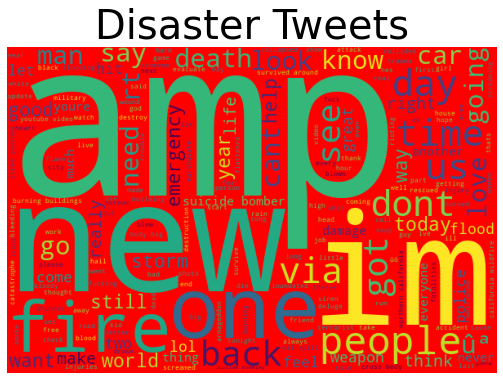

In [185]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='red',
                        width=600,
                        height=400).generate(" ".join(train_df2.text))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Disaster Tweets',fontsize=40);

# 3. Vectorization of text

Pre-process text needs to be transformed into a vetor matrix of numbers before a machine learning model can undertsand it and learn from it.This can be done by a number of tecniques:

## 1. Bag of Words

The bag of words is a representation of text that describes the occurrence of words within a document. It involves two things:
- A vocabulary of known words.
- A measure of the presence of known words.

**Why is it is called a “bag” of words?** Its called bag of words because any information about the order or structure of words in the document is discarded and the model is only concerned with whether the known words occur in the document, not where they occur in the document.

### Bag of Words - Countvectorizer Features

`Countvectorizer` converts a collection of text documents to a matrix of token counts. It is important to note that `CountVectorizer` comes with a lot of options to automatically do preprocessing, tokenization, and stop word removal. However, all the pre-processing of the text has already been performed by creating a function.Only vanilla version of `Countvectorizer` will be used.

## 2. TFIDF Features

A problem with the bag of words approach is that highly frequent words start to dominate in the document (e.g. larger score) but may not contain as much “informational content” this will lead to more weight to longer documents than shorter documents.

To avoid that, one approach is to rescale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called "Term Frequency-Inverse Document Frequency", or TF-IDF for short, where:

**Term Frequency**: is a scoring of the frequency of the word in the current document.

`TF = (Number of times term t appears in a document)/(Number of terms in the document)`

**Inverse Document Frequency**: is a scoring of how rare the word is across documents.

`IDF = 1+log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.`

In [186]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer()
train_cv = count_vectorizer.fit_transform(train_df2['text'])
test_cv = count_vectorizer.transform(test_df2["text"])

## Keeping only non-zero elements to preserve space 
print(train_cv[0].todense())

[[0 0 0 ... 0 0 0]]


In [187]:
# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tf = tfidf.fit_transform(train_df2['text'])
test_tf = tfidf.transform(test_df2["text"])

# 4. Build a Text Classification Machine Learning model

Lets create a simple classification model using commonly used calssification algorithms and check how the models performs.

In [188]:
#Split the CountVector vectorized data into train and test datasets for model training and testing
X_train_cv, X_test_cv, y_train_cv, y_test_cv =train_test_split(train_cv,train_df.target,test_size=0.2,random_state=2020)

In [189]:
#Define a function to fit and predict on training and test data sets
def fit_and_predict(model,X_train,y_train,X_test,y_test):
    
    '''Input- model=model to be trained
              X_train, y_train= traing data set
              X_test,  y_test = testing data set
       Output- Print accuracy of model for training and test data sets   
    '''
    
    # Fitting a simple Logistic Regression on Counts
    clf = model
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    confusion_matrix(y_test,predictions)
    print(classification_report(y_test,predictions))
    print('-'*50)
    print("{}" .format(model))
    print('-'*50)
    print('Accuracy of classifier on training set:{}%'.format(round(clf.score(X_train, y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)

In [190]:
# Create a list of the regression models to be used
models=[LogisticRegression(C=1.0),SVC(),MultinomialNB(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=5),RandomForestClassifier()]

In [191]:
# Loop through the list of models and use 'fit_and_predict()' function to trian and make predictions
for model in models:
    fit_and_predict(model,X_train_cv, y_train_cv,X_test_cv,y_test_cv)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       849
           1       0.84      0.71      0.77       674

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

--------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------------
Accuracy of classifier on training set:96.0%
--------------------------------------------------
Accuracy of classifier on test set:81.0%
--------------------------------------------------
              precision    recall  f1-score   support

  

In [192]:
# Split the TFDIF vectorized data into train and test datasets for model training and testing
X_train_tf, X_test_tf, y_train_tf, y_test_tf =train_test_split(train_tf,train_df.target,test_size=0.2,random_state=2020)

In [193]:
# Loop through the list of models and use 'fit_and_predict()' function to train and make predictions on the TFDIF vectororized data
for model in models:
    fit_and_predict(model,X_train_tf, y_train_tf,X_test_tf,y_test_tf)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       849
           1       0.86      0.67      0.75       674

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

--------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------------
Accuracy of classifier on training set:88.0%
--------------------------------------------------
Accuracy of classifier on test set:80.0%
--------------------------------------------------
              precision    recall  f1-score   support

  

# 5. Results

Based on the above results, lets print the various classifier performance results:

In [194]:
# Printing model performance results.
results_dict={'Classifier':['Logistic regression', 'SVC', 'MultinomialNB', 'DecisionTreeClassifier',
                            'KNeighborsClassifier','RandomForestClassifier'],
              'F1-Score':[0.81, 0.40, .80, .75,0.65,0.76],'Accuracy':['81%', '56%', '80%','75%','69%','77%']} 
results=pd.DataFrame(results_dict)
results

,Classifier,F1-Score,Accuracy
0,Logistic regression,0.81,81%
1,SVC,0.40,56%
2,MultinomialNB,0.80,80%
3,DecisionTreeClassifier,0.75,75%
4,KNeighborsClassifier,0.65,69%
5,RandomForestClassifier,0.76,77%


It seems from all the classifiers tested, `LogisticRegression()` classifier performed best with `CountVectorizer()`.

In [195]:
# Fitting 'LogisticRegression()' with CountVectorizer() fit dataset
clf_logreg = LogisticRegression(C=1.0)
clf_logreg.fit(X_train_cv, y_train_cv)
pred=clf_logreg.predict(X_test_cv)
confusion_matrix(y_test_cv,pred)
print(classification_report(y_test_cv,pred))
print('Accuracy of classifier on training set:{}%'.format(round(clf_logreg.score(X_train_cv, y_train_cv)*100)))
print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test_cv,pred)*100)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       849
           1       0.84      0.71      0.77       674

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

Accuracy of classifier on training set:96.0%
Accuracy of classifier on test set:81.0%


In [196]:
clf_logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Performance Metrics

After implementing a model and getting some output in forms of a probability or a class, the next step is to find out how effective is the model based on some metric using test data sets.Different performance metrics are used to evaluate different Machine Learning Algorithms.

This problem is a classification problem hence I have claculated confusion matrix, F1-score and accuracy as a performacne metric to evaluate model performance.

**1.Confusion Matrix:**

The confusion matrix, is a table with two dimensions (“Actual” and “Predicted”), and sets of “classes” in both dimensions. Our Actual classifications are columns and Predicted ones are Rows.
![image.png](attachment:image.png)

The Confusion matrix in itself is not a performance measure as such, but almost all of the performance metrics are based on Confusion Matrix and the numbers inside it.

**3.F1-Score:**

F1-score combines precision and recall relative to a specific positive class. The F1-score can be interpreted as a weighted average of the precision and recall, where an F1-score reaches its best value at 1 and worst at 0.

**2.Accuracy**:

Accuracy in classification problems is the number of correct predictions made by the model over all predictions made.

Accuracy is good measure when target class variable in the training dataset is nearly balanced.The distribution of the target class in provided training set is 57% for `0` class to 43% for `1` class which is about equally distributed.
Due to this reason i chose 'accuracy' to be model performance evalution metric for this problem.

### Model Improvements

The result from `LogisticRegression()` classifier seems good enough than rest of the classifiers to be used as a final model.Based on the above results, it seems the classifier is not over fitting but lets try to improve the model by tuning some hyper parameters of the classifier.

In [197]:
# Create the list of various hyper parameters to try
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
logreg= LogisticRegression()

# Define and fit grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_cv, y_train_cv)

# Summarize and print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.795676 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


From above results, it seems orignal classifier with default parameters performed best so that will be used as the final model for test data predictions.

In [198]:
# Lets apply pre-processing function to clean and pre-process text data before vectorizing
test_df_final=test_df.copy()
test_df_final['text'] = test_df_final['text'].apply(lambda x : pre_process_text_combined(x))

In [199]:
# Lets fit the test data with Countvectorizer() method to vectroize the data
test_vector = count_vectorizer.transform(test_df_final["text"])

Lets create a function to generate predictions for the provided test data for submission.

In [200]:
# Define a function to generate predictions and store in a.csv file for submission on Kaggle
def submission(sub_file,model,test_vector):
    
    '''Input- sub_file=Location of the file submission file
              model=final fit model to be used for predictions
              test_vector=pre-processed and vectorized test dataset
       Output- submission file in .csv format with predictions       
    
    '''
    sub_df = pd.read_csv(sub_file)
    sub_df["target"] = model.predict(test_vector)
    sub_df.to_csv("submission.csv", index=False)

In [201]:
# Use Submission() function to generate submission file for posting on Kaggle
sub_file = "https://raw.githubusercontent.com/pavstar619/Data-Science-Capstone/master/sample_submission.csv"
test_vector=test_vector
submission(sub_file,clf_logreg,test_vector)

In [202]:
''' from google.colab import files
files.download("submission.csv") '''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6. Challenges

Working on this data science capstone project went pretty smoothly without many issues. Even though every step in developing this project was smooth, following complications were faced:

- There are only about 7000 data records for training which seems low and hence accuracy of model suffers.
- I took the NLP challenge for my capstone project and this area is new and challenging for me since i had to start from scratch. 
- Learning new area and working on a capstone project was little difficult due to the fact that I don't have much time left  on my nano degree.  
- New topic and less time also restricted me to test few more models from deep neural network area.


# 7. Conclusion

In this capstone project, I took a Kaggle challenge to classify tweets into disaster tweets in real or not?. First, I have analyzed and explored all the provided tweets data to visualize the statistical and other properties of the presented data.Next, I performed some exploratory analysis of the data to check type of the data, whether there are unwanted features and if features have missing data. Based on the analysis, I decided to drop ‘location’ column since it has most the data missing and really have no effect on classification of tweets. The ‘text’ columns is all text data along with alpha numeric, special characters and embedded URLs.The ‘text’ column data needs to be cleaned and pre processed and vectorized before it can be used with a machine learning algorithm for the classification of the tweets.

After pre processing the train and test data,the data was vectorized using `CountVectorizer` and `TFIDF` features and then it was split into training and test data, and then various classifiers were fit on the data and predictions were made.Out of all classifiers tested, LogisticRegression() performed the best with the test accuracy of 81%. An effort was made to tune some hyper parameters of the final classifier to see if accuracy can be improved.It turned out that classifier with default parameters preformed little better than tuned model .

Finally, `LogisticRegression()` classifier with default parameters was selected as final model for this NLP classifications challenge and predictions were made on the test data. Kaggle submission³ of the predictions resulted in an accuracy of 79%.

# 8. Improvements

I believe there are definitely opportunities to try out various machine learning models to see if there are better performing models could be found to solve this problem with higher than 79% accuracy.

Trying neural network and deep neural network models such as `RNN(Recurrent Neural Network)` might result in higher accuracy and better performance but may be very costly in terms of compute resources used.

Another way to improve the accuracy of the models would be to have more training data than given.